In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=pd.read_csv("Ads_CTR_Optimisation.csv")
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


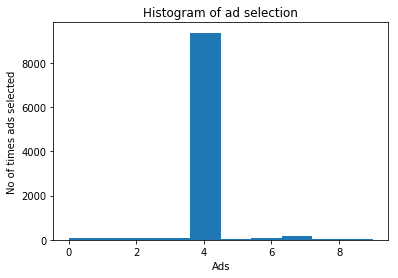

In [3]:
import random
#implementing thomson sampling

#STEP 1
d=10

total_reward=0
#STEP 2
N=10000
numbers_of_rewards_0 = [0] * d
numbers_of_rewards_1 = [0] * d
average_reward=0
ads_selected = []
for n in range (0,N):
    max_random = 0
    ad=0
    for i in range(0,10):
        random_beta= random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad=i

    #STEP 3
    ads_selected.append(ad)
    reward= dataset.values[n,ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

    total_reward= total_reward + reward

plt.hist(ads_selected)
plt.title('Histogram of ad selection')
plt.xlabel('Ads')
plt.ylabel('No of times ads selected')
plt.show()
